# Movie Recommender System

In this iPython Notebook, I have created basic Movie Recommender System with Python.

It is an extension from the project: https://github.com/krishnaik06/Movie-Recommender-in-python
The Dataset used is subset of MovieLens Dataset

Extension: Have created a text input bar to add your movie whose recommendation you want. Output will give you top 4 matches that are recommended movies.


In [181]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.html.widgets import *
sns.set_style('white')
%matplotlib inline

In [158]:
#Get the data into Pandas Dataframe object
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('dataset.csv', sep = '\t', names = column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [159]:
#Get the Movie Titles
movie_titles = pd.read_csv('movieIdTitles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [160]:
#Merge the dataset with movie titles
df = pd.merge(df, movie_titles, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


### Do some Exploratory Data Analysis

In [161]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [162]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [163]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [164]:
ratings['numOfRatings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,numOfRatings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


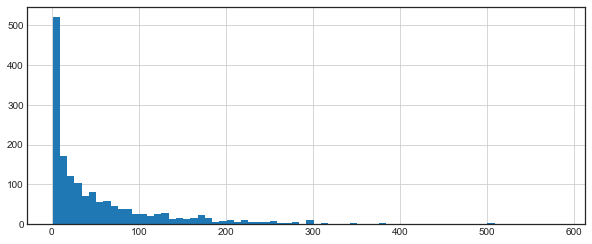

In [165]:
plt.figure(figsize = (10,4))
ratings['numOfRatings'].hist(bins = 70)

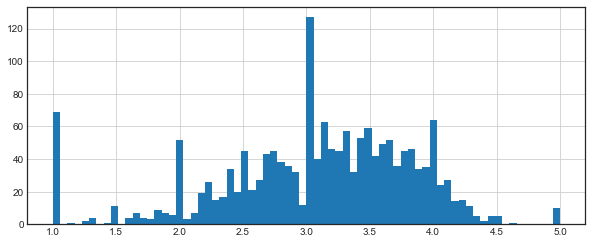

In [166]:
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins = 70)

/Users/rudrajikadra/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/rudrajikadra/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


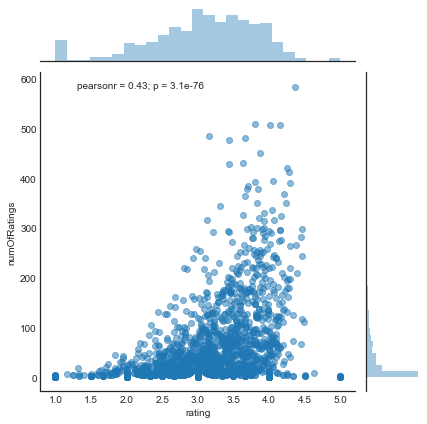

In [167]:
sns.jointplot(x='rating', y='numOfRatings', data = ratings, alpha = 0.5)

### Create the Recommendation System

Create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [168]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
#Most Rated Movies with their Average Ratings
ratings.sort_values('numOfRatings', ascending = False).head(10)

,rating,numOfRatings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Now we will create a correlation matrix of every movie with every other movie on user ratings. We will then use that correlation matrix to find top matches that relates the best for a particular movie (having atleast 100 ratings) and the result obtained (recommended movies) will then be added to the ratings dataframe of every movie. Those whose matches could not be obtained using correlation, their value will be converted to "-".

In [170]:
for i in ratings.index:
    movieUserRatings = moviemat[i]
    similarToThatMovie = moviemat.corrwith(movieUserRatings)
    corr_toMovie = pd.DataFrame(similarToThatMovie, columns = ['Correlation'])
    corr_toMovie.dropna(inplace = True)
    corr_toMovie = corr_toMovie.join(ratings['numOfRatings'])
    result = corr_toMovie[corr_toMovie['numOfRatings'] > 100].sort_values('Correlation', ascending = False).head()
    if result['numOfRatings'].count() >= 5:
        print(i)
        ratings.loc[i, 'FirstMovieRecommendation'] = result.iloc[1:2].index.values[0]
        ratings.loc[i, 'SecondMovieRecommendation'] = result.iloc[2:3].index.values[0]
        ratings.loc[i, 'ThirdMovieRecommendation'] = result.iloc[3:4].index.values[0]
        ratings.loc[i, 'FourthMovieRecommendation'] = result.iloc[4:5].index.values[0]
    

/Users/rudrajikadra/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/rudrajikadra/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


'Til There Was You (1997)
1-900 (1994)
101 Dalmatians (1996)
12 Angry Men (1957)
187 (1997)
2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)
2001: A Space Odyssey (1968)
39 Steps, The (1935)
8 1/2 (1963)
8 Heads in a Duffel Bag (1997)
8 Seconds (1994)
A Chef in Love (1996)
Above the Rim (1994)
Absolute Power (1997)
Abyss, The (1989)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
Across the Sea of Time (1995)
Addams Family Values (1993)
Addicted to Love (1997)
Addiction, The (1995)
Adventures of Pinocchio, The (1996)
Adventures of Priscilla, Queen of the Desert, The (1994)
Adventures of Robin Hood, The (1938)
Affair to Remember, An (1957)
African Queen, The (1951)
Afterglow (1997)
Age of Innocence, The (1993)
Air Bud (1997)
Air Force One (1997)
Air Up There, The (1994)
Airheads (1994)
Akira (1988)
Aladdin (1992)
Aladdin and the King of Thieves (1996)
Alaska (1996)
Albino Alligator (1996)
Alice in Wonderland (1951)
Alien (1979)
Alien 3 (1992)
Alien

Daylight (1996)
Days of Thunder (1990)
Daytrippers, The (1996)
Dazed and Confused (1993)
Dead Man (1995)
Dead Man Walking (1995)
Dead Poets Society (1989)
Dead Presidents (1995)
Dear God (1996)
Death and the Maiden (1994)
Deceiver (1997)
Deconstructing Harry (1997)
Deep Rising (1998)
Deer Hunter, The (1978)
Delicatessen (1991)
Delta of Venus (1994)
Demolition Man (1993)
Denise Calls Up (1995)
Designated Mourner, The (1997)
Desperado (1995)
Desperate Measures (1998)
Devil in a Blue Dress (1995)
Devil's Advocate, The (1997)
Devil's Own, The (1997)
Diabolique (1996)
Dial M for Murder (1954)
Die Hard (1988)
Die Hard 2 (1990)
Die Hard: With a Vengeance (1995)
Die xue shuang xiong (Killer, The) (1989)
Dingo (1992)
Dirty Dancing (1987)
Disclosure (1994)
Diva (1981)
Dolores Claiborne (1994)
Don Juan DeMarco (1995)
Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)
Donnie Brasco (1997)
Doom Generation, The (1995)
Doors, The (1991)
Double Happiness (1994)
Double Team

Island of Dr. Moreau, The (1996)
It Could Happen to You (1994)
It Happened One Night (1934)
It Takes Two (1995)
It's My Party (1995)
It's a Wonderful Life (1946)
Jack (1996)
Jack and Sarah (1995)
Jackal, The (1997)
Jackie Brown (1997)
Jackie Chan's First Strike (1996)
Jade (1995)
James and the Giant Peach (1996)
Jane Eyre (1996)
Jason's Lyric (1994)
Jaws (1975)
Jaws 2 (1978)
Jaws 3-D (1983)
Jean de Florette (1986)
Jefferson in Paris (1995)
Jeffrey (1995)
Jerky Boys, The (1994)
Jerry Maguire (1996)
Jimmy Hollywood (1994)
Jingle All the Way (1996)
Joe's Apartment (1996)
Johnny 100 Pesos (1993)
Johnny Mnemonic (1995)
Journey of August King, The (1995)
Joy Luck Club, The (1993)
Jude (1996)
Judge Dredd (1995)
Judgment Night (1993)
Jumanji (1995)
Jungle Book, The (1994)
Jungle2Jungle (1997)
Junior (1994)
Jurassic Park (1993)
Juror, The (1996)
Jury Duty (1995)
Just Cause (1995)
Kalifornia (1993)
Kama Sutra: A Tale of Love (1996)
Kansas City (1996)
Kaspar Hauser (1993)
Kazaam (1996)
Keys to Tu

Paradise Road (1997)
Parent Trap, The (1961)
Paris Is Burning (1990)
Paris, France (1993)
Paris, Texas (1984)
Party Girl (1995)
Passion Fish (1992)
Pather Panchali (1955)
Paths of Glory (1957)
Patton (1970)
Peacemaker, The (1997)
Penny Serenade (1941)
People vs. Larry Flynt, The (1996)
Perez Family, The (1995)
Perfect Candidate, A (1996)
Perfect World, A (1993)
Persuasion (1995)
Pest, The (1997)
Pete's Dragon (1977)
Phantom, The (1996)
Phantoms (1998)
Phat Beach (1996)
Phenomenon (1996)
Philadelphia (1993)
Philadelphia Story, The (1940)
Piano, The (1993)
Picnic (1955)
Picture Bride (1995)
Picture Perfect (1997)
Pie in the Sky (1995)
Pillow Book, The (1995)
Pink Floyd - The Wall (1982)
Pinocchio (1940)
Platoon (1986)
Playing God (1997)
Pocahontas (1995)
Poetic Justice (1993)
Poison Ivy II (1995)
Pollyanna (1960)
Pompatus of Love, The (1996)
Ponette (1996)
Portrait of a Lady, The (1996)
Postino, Il (1994)
Postman, The (1997)
Powder (1995)
Preacher's Wife, The (1996)
Pretty Woman (1990)
P

Tie That Binds, The (1995)
Time Tracers (1995)
Time to Kill, A (1996)
Timecop (1994)
Tin Cup (1996)
Tin Drum, The (Blechtrommel, Die) (1979)
Tin Men (1987)
Titanic (1997)
To Be or Not to Be (1942)
To Catch a Thief (1955)
To Die For (1995)
To Gillian on Her 37th Birthday (1996)
To Have, or Not (1995)
To Kill a Mockingbird (1962)
To Live (Huozhe) (1994)
To Wong Foo, Thanks for Everything! Julie Newmar (1995)
Tom & Viv (1994)
Tom and Huck (1995)
Tombstone (1993)
Tommy Boy (1995)
Tomorrow Never Dies (1997)
Top Gun (1986)
Top Hat (1935)
Total Eclipse (1995)
Touch (1997)
Touch of Evil (1958)
Tough and Deadly (1995)
Toy Story (1995)
Trainspotting (1996)
Transformers: The Movie, The (1986)
Traveller (1997)
Treasure of the Sierra Madre, The (1948)
Trees Lounge (1996)
Trial and Error (1997)
Trial by Jury (1994)
Trigger Effect, The (1996)
True Crime (1995)
True Lies (1994)
True Romance (1993)
Truman Show, The (1998)
Trust (1990)
Truth About Cats & Dogs, The (1996)
Truth or Consequences, N.M. (199

In [195]:
#Check the result 
ratings.head()

,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
title,,,,,,
'Til There Was You (1997),2.333333,9,Primal Fear (1996),Indiana Jones and the Last Crusade (1989),"Edge, The (1997)",Beautiful Girls (1996)
1-900 (1994),2.600000,5,"Full Monty, The (1997)","Crow, The (1994)","Ice Storm, The (1997)",Hoop Dreams (1994)
101 Dalmatians (1996),2.908257,109,Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)"
12 Angry Men (1957),4.344000,125,Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994)
187 (1997),3.024390,41,Maverick (1994),Conan the Barbarian (1981),"Magnificent Seven, The (1954)",Cool Hand Luke (1967)


In [198]:
ratings = ratings.fillna('-')

In [199]:
#Save the ratings data for later use
ratings.to_csv('MovieRecommendations.csv', encoding='utf-8')

# Load the Saved Recommendation Data Generated for Reusability

In [200]:
#Load the dataset saved for reusability from this code block onwards
df_result = pd.read_csv('MovieRecommendations.csv')
df_result.head()

,title,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
0,'Til There Was You (1997),2.333333,9,Primal Fear (1996),Indiana Jones and the Last Crusade (1989),"Edge, The (1997)",Beautiful Girls (1996)
1,1-900 (1994),2.600000,5,"Full Monty, The (1997)","Crow, The (1994)","Ice Storm, The (1997)",Hoop Dreams (1994)
2,101 Dalmatians (1996),2.908257,109,Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)"
3,12 Angry Men (1957),4.344000,125,Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994)
4,187 (1997),3.024390,41,Maverick (1994),Conan the Barbarian (1981),"Magnificent Seven, The (1954)",Cool Hand Luke (1967)


In [201]:
#Load all the movie names
for i in df_result['title']:
    print(i)

'Til There Was You (1997)
1-900 (1994)
101 Dalmatians (1996)
12 Angry Men (1957)
187 (1997)
2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)
2001: A Space Odyssey (1968)
3 Ninjas: High Noon At Mega Mountain (1998)
39 Steps, The (1935)
8 1/2 (1963)
8 Heads in a Duffel Bag (1997)
8 Seconds (1994)
A Chef in Love (1996)
Above the Rim (1994)
Absolute Power (1997)
Abyss, The (1989)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
Across the Sea of Time (1995)
Addams Family Values (1993)
Addicted to Love (1997)
Addiction, The (1995)
Adventures of Pinocchio, The (1996)
Adventures of Priscilla, Queen of the Desert, The (1994)
Adventures of Robin Hood, The (1938)
Affair to Remember, An (1957)
African Queen, The (1951)
Afterglow (1997)
Age of Innocence, The (1993)
Aiqing wansui (1994)
Air Bud (1997)
Air Force One (1997)
Air Up There, The (1994)
Airheads (1994)
Akira (1988)
Aladdin (1992)
Aladdin and the King of Thieves (1996)
Alaska (1996)
Albino Alligator (1

Saint of Fort Washington, The (1993)
Saint, The (1997)
Salut cousin! (1996)
Santa Clause, The (1994)
Santa with Muscles (1996)
Savage Nights (Nuits fauves, Les) (1992)
Scarlet Letter, The (1926)
Scarlet Letter, The (1995)
Schindler's List (1993)
Schizopolis (1996)
Scout, The (1994)
Scream (1996)
Scream 2 (1997)
Scream of Stone (Schrei aus Stein) (1991)
Screamers (1995)
Search for One-eye Jimmy, The (1996)
Searching for Bobby Fischer (1993)
Second Jungle Book: Mowgli & Baloo, The (1997)
Secret Adventures of Tom Thumb, The (1993)
Secret Agent, The (1996)
Secret Garden, The (1993)
Secret of Roan Inish, The (1994)
Secrets & Lies (1996)
Selena (1997)
Sense and Sensibility (1995)
Senseless (1998)
Serial Mom (1994)
Set It Off (1996)
Seven (Se7en) (1995)
Seven Years in Tibet (1997)
Seventh Seal, The (Sjunde inseglet, Det) (1957)
Sex, Lies, and Videotape (1989)
Sexual Life of the Belgians, The (1994)
Sgt. Bilko (1996)
Shadow Conspiracy (1997)
Shadow of Angels (Schatten der Engel) (1976)
Shadow,

In [236]:
inputMovieName = widgets.Text()

def getRecommendations(sender):
    searchMovie = inputMovieName.value
    list_result = df_result[df_result['title'] == searchMovie]
    fm = list_result['FirstMovieRecommendation'].values[0]
    sm = list_result['SecondMovieRecommendation'].values[0]
    tm = list_result['ThirdMovieRecommendation'].values[0]
    fourthm = list_result['FourthMovieRecommendation'].values[0]
    finalRecommendationText = '1:' + fm + ' \n2:' + sm + ' \n3:' + tm + ' \n4:' + fourthm
    print('Your Recommendations for the Movie ' + searchMovie + ' are:\n')
    print(finalRecommendationText)
    

### How to get Recommendations?
- Select and Copy any movie from the list of Movie Names above
- Add that to the text box below
##### You will have your Movie Recommendation for that Particular movie :)

Note:- On every run the paste command will keep on appending the current output. To clear the output just run the below cell again.

In [241]:
inputMovieName.on_submit(getRecommendations)
inputMovieName

Text(value='Star Wars (1977)')

Your Recommendations for the Movie Star Wars (1977) are:

1:Empire Strikes Back, The (1980) 
2:Return of the Jedi (1983) 
3:Raiders of the Lost Ark (1981) 
4:Austin Powers: International Man of Mystery (1997)
